## Sólido semi-infinito unidimensional

Graficar y hacer una película de la distribución de temperatura de los siguientes casos:

En una pared infinita con temperatura de superficie constante $T(0,t)=T_s$

$$\frac{T(x,t)-T_s}{T_i-T_s} = erf \left( \frac{x}{2 \sqrt(\alpha t)} \right) $$

En una pared infinita con condición de frontera oscilatoria en el tiempo

$$\frac{T(x,t)-T_i}{\Delta T}= \exp \left(-x \sqrt{\omega/2\alpha } \right) \sin \left(\omega t- x \sqrt{\omega/2 \alpha} \right) $$




In [18]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from scipy.special import erf, erfc
%config Completer.use_jedi = False

exp,sin,sqrt = np.exp,np.sin,np.sqrt

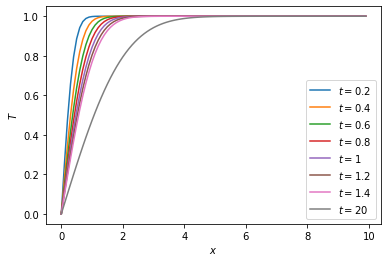

In [19]:
#Temperatura de superficie constante
%matplotlib inline

x0    = 0
lx    = 10
alpha = 1
x     = np.arange(x0,lx,(lx-x0)/100)

def T_cst(x,t):
    T = erf(x/sqrt(alpha*t))
    return T

fig,ax = plt.subplots()

#ax.plot(x,T_cst(x,0),label="$t=0$")
ax.plot(x,T_cst(x,0.2),label="$t=0.2$")
ax.plot(x,T_cst(x,0.4),label="$t=0.4$")
ax.plot(x,T_cst(x,0.6),label="$t=0.6$")
ax.plot(x,T_cst(x,0.8),label="$t=0.8$")
ax.plot(x,T_cst(x,1),label="$t=1$")
ax.plot(x,T_cst(x,1.2),label="$t=1.2$")
ax.plot(x,T_cst(x,1.4),label="$t=1.4$")
ax.plot(x,T_cst(x,5),label="$t=20$")
ax.legend()

ax.set_xlabel("$x$")
ax.set_ylabel("$T$")

plt.show()

<IPython.core.display.Javascript object>


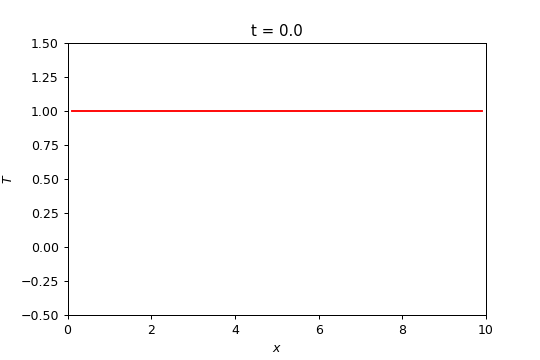

In [20]:
#Temperatura de superficie constante
%matplotlib notebook

omega= 1
alpha= 1
N    = 100
dT   = 10
x0   = 0
lx   = 10
x    = np.arange(x0, lx,(lx-x0)/N)

t0   = 0
tmax = 1
dt   = 0.01

fig, ax   = plt.subplots()
plotLine, = ax.plot(x, np.zeros(len(x))*np.NaN, 'r-')
plotTitle = ax.set_title("t=0")
ax.set_xlabel('$x$')
ax.set_ylabel('$T$')
ax.set_ylim(-0.5,1.5)
ax.set_xlim(x0,lx)

def Tcs(t):
    T = erf(x/sqrt(alpha*t))
    return T

def animate(t):    
    plotLine.set_ydata(Tcs(t))
    plotTitle.set_text(f"t = {t:.1f}")
    return [plotLine,plotTitle]


ani = animation.FuncAnimation(fig, func=animate, frames = np.arange(t0, tmax+dt, dt), blit=True)
plt.show()



<IPython.core.display.Javascript object>


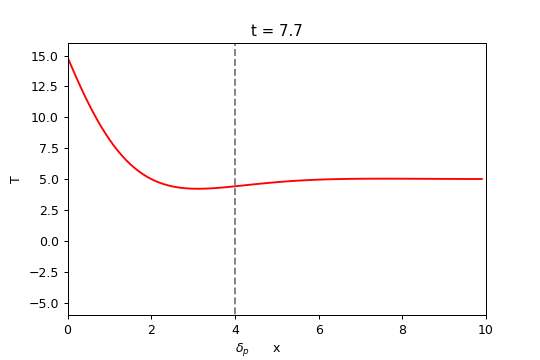

In [21]:
#Periodic heating animation
%matplotlib notebook

dt    = 0.1
omega = 1
alpha = 1
Ti    = 5
N     = 100
dT    = 10
x0    = 0
lx    = 10
x     = np.arange(x0, lx,(lx-x0)/N)
t0    = 0
tmax  = 20
dt    = 0.1
delta = 4*sqrt(alpha/omega)


fig, ax1 = plt.subplots()
ax1.set_xlabel('x')
ax1.set_ylabel('T')
plotLine, = ax1.plot(x, np.zeros(len(x))*np.NaN, 'r-')
plotTitle = ax1.set_title("t=0")

ax1.vlines(x=delta, color='grey', ymin=-10, ymax=20,linestyle='--') #para poner la línea

ax1.text(delta,-9,"$\\delta_p$",color="black") #para escribir theta_b
ax1.set_ylim(-6,16)
ax1.set_xlim(x0,lx)

def T(t):
    T = Ti + dT*exp(-x*sqrt(omega/2*alpha))*sin((omega*t)-(x*sqrt(omega/2*alpha)))
    return T


def animate(t):
    plotLine.set_ydata(T(t))
    plotTitle.set_text(f"t = {t:.1f}")
    return [plotLine,plotTitle]


ani = animation.FuncAnimation(fig, func=animate, frames = np.arange(t0, tmax+dt, dt), blit=True)
plt.show()
